In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, classification_report


In [11]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [12]:
df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

df.drop('customerID', axis=1, inplace=True)


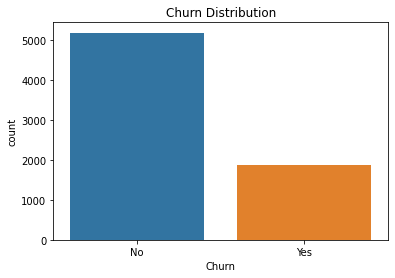

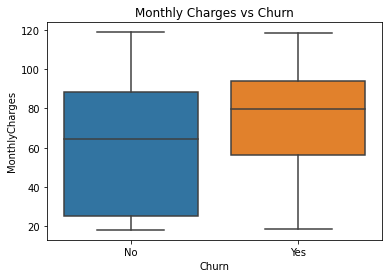

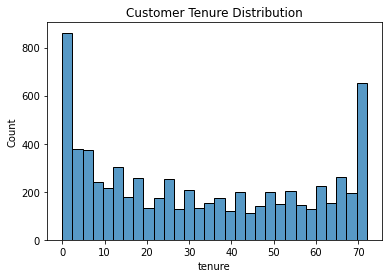

In [14]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

sns.histplot(df['tenure'], bins=30)
plt.title("Customer Tenure Distribution")
plt.show()


In [15]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [16]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


Logistic Regression Accuracy: 0.8029528676888131
Recall: 0.5588865096359743
ROC-AUC: 0.8440736193070306


In [19]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


Random Forest Accuracy: 0.7915956842703009
Recall: 0.4796573875802998
ROC-AUC: 0.8254040225186912


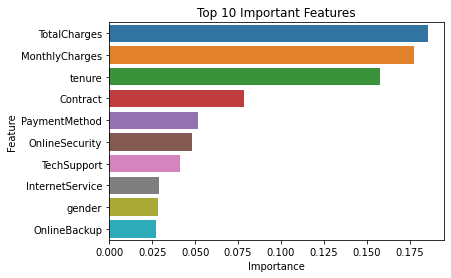

In [20]:
importances = rf.feature_importances_
features = X.columns

feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feat_imp.head(10))
plt.title("Top 10 Important Features")
plt.show()


In [21]:
predictions = pd.DataFrame({
    "Actual_Churn": y_test.values,
    "Predicted_Churn": y_pred_rf,
    "Churn_Probability": y_prob_rf
})

predictions.head(10)


,Actual_Churn,Predicted_Churn,Churn_Probability
0,0,0,0.165
1,0,0,0.135
2,0,0,0.030
3,0,1,0.860
4,0,0,0.035
5,1,1,0.740
6,0,0,0.205
7,0,0,0.000
8,0,1,0.555
9,0,1,0.665


In [22]:
high_risk_customers = predictions[predictions["Churn_Probability"] > 0.7]
high_risk_customers.head()


,Actual_Churn,Predicted_Churn,Churn_Probability
3,0,1,0.860
5,1,1,0.740
10,0,1,0.945
30,0,1,0.895
34,1,1,0.900


> PREDICT FOR A NEW CUSTOMER (REAL-WORLD USE CASE)

In [23]:
new_customer = pd.DataFrame({
    'gender': [1],
    'SeniorCitizen': [0],
    'Partner': [1],
    'Dependents': [0],
    'tenure': [5],
    'PhoneService': [1],
    'MultipleLines': [0],
    'InternetService': [1],
    'OnlineSecurity': [0],
    'OnlineBackup': [0],
    'DeviceProtection': [0],
    'TechSupport': [0],
    'StreamingTV': [1],
    'StreamingMovies': [1],
    'Contract': [0],
    'PaperlessBilling': [1],
    'PaymentMethod': [2],
    'MonthlyCharges': [85],
    'TotalCharges': [425]
})


In [24]:
new_customer_scaled = scaler.transform(new_customer)


In [25]:
churn_prediction = rf.predict(new_customer_scaled)
churn_probability = rf.predict_proba(new_customer_scaled)[:,1]

if churn_prediction[0] == 1:
    print("⚠️ Customer is likely to STOP using the service")
else:
    print("✅ Customer is likely to CONTINUE the service")

print("Churn Probability:", churn_probability[0])


⚠️ Customer is likely to STOP using the service
Churn Probability: 0.835
